In [1004]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

In [1005]:
sns.__version__ #version should be 0.11.2

'0.11.2'

In [1012]:
weightData = pd.read_csv('weightData.csv')

# Population pyramid [22 pts]

Plot the pyramid for the newborns' weights. 

You need to use the `np.histogram` function from numpy to count the values in a specificied bins. For the weigth bins (vertical axis), use: '<750','750-1249','1250-1749','1750-2249','2250-2749','2750-3249','3250-3749','3750-4249','4250-4749','4750+'.

Using the bins and counts returned by `np.histogram`, use the matplotlib's barsh function to plot the bars. 


<img title="pyramid" src="pyramid.png" width="500">
 


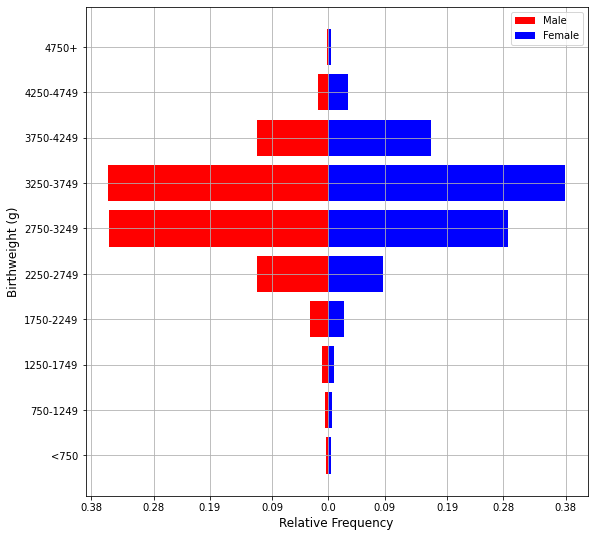

In [1057]:
weightData = pd.read_csv('weightData.csv') #reload data for every question

sns.reset_orig()

min_bin = weightData['birthweight'].min()
max_bin = weightData['birthweight'].max()

bin_edgesAll = [min_bin, 750, 1250, 1750, 2250, 2750, 3250, 3750, 4250, 4750, max_bin]

histMale, bin_edgesarrayMale = np.histogram( weightData.loc[ weightData['sex']=='F']['birthweight'], bins = bin_edgesAll )
histFemale, bin_edgesarrayFemale = np.histogram( weightData.loc[ weightData['sex']=='M']['birthweight'], bins = bin_edgesAll )

fig, ax = plt.subplots(figsize=(9,9))
plt.barh(np.arange(len(histMale)), histMale/np.sum(histMale)*-1, color='red', label="Male")
plt.barh(np.arange(len(histFemale)), histFemale/np.sum(histFemale), color='blue', label="Female")
ax.set_xlabel("Relative Frequency", fontsize=12)
ax.set_ylabel("Birthweight (g)", fontsize=12)

ax.set_yticks(  np.arange( len(histMale) )  )
ax.set_yticklabels(  ['<750', '750-1249','1250-1749','1750-2249','2250-2749','2750-3249','3250-3749','3750-4249','4250-4749','4750+' ])
ax.set_xticks([-0.38, -0.28, -0.19, -0.09, 0, 0.09, 0.19, 0.28, 0.38])
ax.set_xticklabels( ['0.38', '0.28', '0.19','0.09','0.0','0.09','0.19','0.28','0.38'])

plt.legend()
plt.grid()

# Gestational month histogram [12pts]

Plot the histogram of the birtweight for both sexes using a FacetGrid.

<img title="histGA" src="histGA.png" width="500">
 


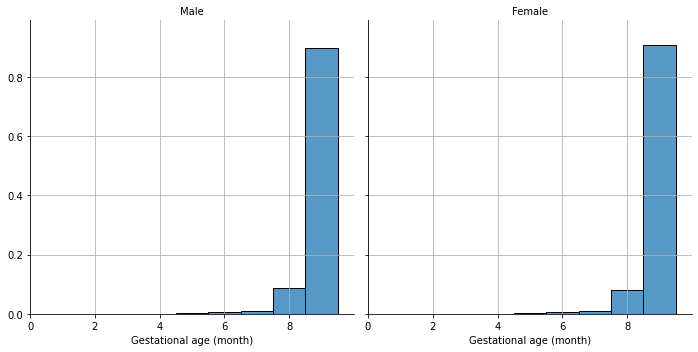

In [1013]:
weightData = pd.read_csv('weightData.csv') #reload data for every question

#wrangling provided by the template
def gaWeeksToMonth(gaWeek):
    
    if gaWeek < 4 :
        return 1
    elif gaWeek < 10 :
        return 2
    elif gaWeek < 13 :
        return 3
    elif gaWeek < 19 :
        return 4
    elif gaWeek < 23 :
          return 5          
    elif gaWeek < 28 :
        return 6
    elif gaWeek < 32 :
        return 7
    elif gaWeek < 37 :
        return 8
    else :
        return 9
    
#wrangling
weightData['monthGA'] = weightData['ga'].apply(lambda x:  gaWeeksToMonth(x))
weightData["sex"] = weightData["sex"].map({'M': "Male", "F": "Female"})
weightData.rename(columns={"monthGA": "Gestational age (month)"}, inplace=True)

#plotting
g = sns.FacetGrid(weightData, col='sex', height=5 ,sharex=True, sharey=True)
g.map(sns.histplot, "Gestational age (month)", bins=9, stat='probability', linewidth=1.0, edgecolor='black', discrete=True)
g.set_titles('{col_name}')
g.set(xlim=(0,9.99),ylim=(0,0.99))
g.set(ylabel=None) #remove the y label

#add gridlines
g.axes[0,0].grid()
g.axes[0,1].grid()

plt.show()


# Violin plot [22 pts]

Create a violin plot to show the distribution of birthweights by gestational age in months.

Check the Seaborn's violinplot documentation to generate distribution by sex in the same plot.

<img title="violin" src="violin.png" width="600">
 

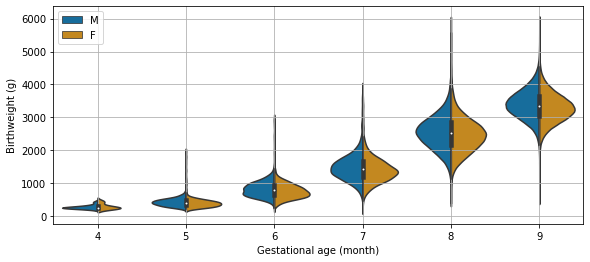

In [1014]:
weightData = pd.read_csv('weightData.csv') #reload data for every question

sns.reset_orig()

weightData['monthGA'] = weightData['ga'].apply(lambda x:  gaWeeksToMonth(x))

g = plt.subplots(figsize=(9.5,4)) #exact same size as provided png
g = sns.violinplot(data=weightData, x="monthGA", y="birthweight", hue="sex", split=True, palette="colorblind")
g.set_xlabel('Gestational age (month)')
g.set_ylabel('Birthweight (g)')
g.legend(loc='upper left')
plt.grid()
plt.show()

# Bivariate histogram [22ts]

Create a bivarate histogram to display the number of births per hour and week day.


<img title="birthsDays" src="birthsDays.png" width="500">
 

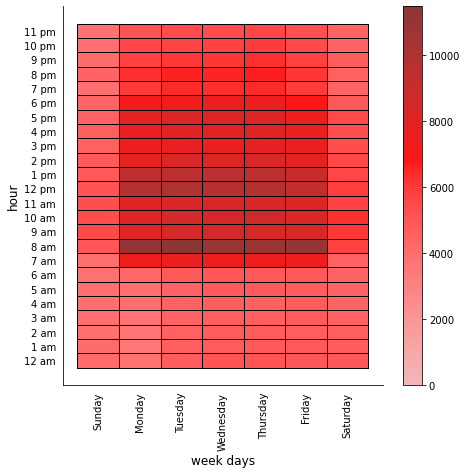

In [1015]:
weightData = pd.read_csv('weightData.csv') #reload data for every question

df_3 = weightData.groupby(['dayWeek', 'hour']).size().reset_index(name='count') #wrangle count data

#map / rename data for easy labelling purposes (there are multiple ways to do this)
day = {2:'Monday', 3:'Tuesday', 4:'Wednesday', 5:'Thursday', 6:'Friday', 7:'Saturday', 1:'Sunday'}
df_3['day_of_week'] = df_3['dayWeek'].apply(lambda x: day[x])

hour = {0:'12 am', 1:'1 am', 2:'2 am', 3:'3 am', 4:'4 am', 5:'5 am', 6:'6 am', 7:'7 am',
        8:'8 am', 9:'9 am', 10:'10 am', 11:'11 am', 12:'12 pm', 13:'1 pm', 14:'2 pm', 15:'3 pm',
        16:'4 pm', 17:'5 pm', 18:'6 pm', 19:'7 pm', 20:'8 pm', 21:'9 pm', 22:'10 pm', 23:'11 pm', 24:'12 pm'}
df_3['hour_of_day'] = df_3['hour'].apply(lambda x: hour[x])

#plan/measure bins
dayBins = np.linspace(weightData['dayWeek'].min(), weightData['dayWeek'].max()+1, ( weightData['dayWeek'].max() - weightData['dayWeek'].min() )+2) - 0.5
hourBins = np.linspace(weightData['hour'].min()+1, weightData['hour'].max()+1, ( weightData['hour'].max() - weightData['hour'].min() )+1) - 0.5

#plotting
ax = sns.displot(data=df_3, x="day_of_week", y="hour_of_day", weights="count", cbar=True, color='red', height=6, aspect=1.1, bins=(dayBins, hourBins), edgecolor="black", linewidth=0.8, kind="hist")
plt.ylim(reversed(plt.ylim()))

locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.xlabel('week days', fontsize=12)
plt.ylabel('hour', fontsize=12)
plt.tick_params(left=False, bottom=False)
plt.show()

# Boxplot [22 pts]

Create a boxplot to compare the weight of the first birth', second birth and third or higher births. Only use data from newborns whose gestational age is greater than or equal to 37 weeks. Use the variable lw_flag to separate the plot for newborns with low and normal weight. 

<img title="birthsDays" src="boxplotWeights.png" width="600">
 
 

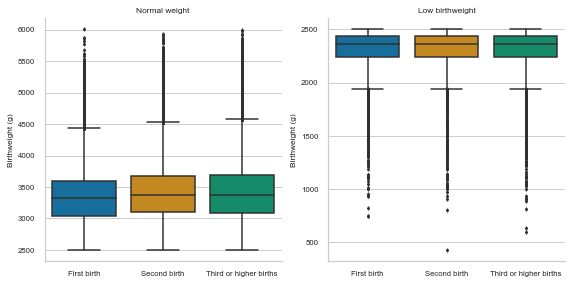

In [1025]:
weightData = pd.read_csv('weightData.csv') #reload data each plot (just in case)
weightData  = weightData.loc[(weightData['ga']>=37)] #only use data from newborns whose gestational age is greater than or equal to 37 weeks

weightData['births'] = weightData['prevBirths'] 
weightData['births'] = weightData['births'].replace({2:2, 3:3,4:3,5:3,6:3,7:3,8:3,9:3})

weightData['lw_flag'] = 0
weightData.loc[ weightData['birthweight'] < 2500, 'lw_flag'] = 1
weightData["lw_flag"] = weightData["lw_flag"].map({0: "Normal weight", 1: "Low birthweight"}) #map column for naming purposes

birth_label = {1:'First birth', 2:'Second birth', 3:'Third or higher births'}
weightData['births'] = weightData['births'].apply(lambda x: birth_label[x])


#plotting
sns.set(font_scale = 0.7)
sns.set_style("whitegrid")

g = sns.FacetGrid(weightData, col='lw_flag', height=4, sharey=False)
g.map(sns.boxplot,  "births",  "birthweight", palette="colorblind", order=["First birth","Second birth","Third or higher births"], fliersize = 2.5)
g.set(xlabel=None) #remove the x label
g.set_titles('{col_name}') #call each plot by name in lw_flag column

#adjust y axis
g.axes[0,0].set_ylabel('Birthweight (g)')
g.axes[0,1].set_ylabel('Birthweight (g)')

plt.tight_layout()
